# Momentum - NAG

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
Y = -1 * X + 2
Y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

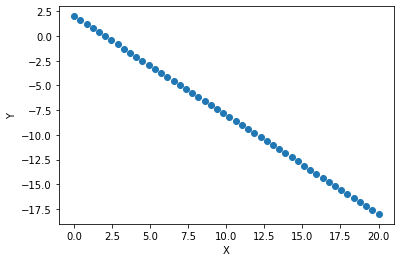

In [4]:
plt.scatter(X,Y);
plt.xlabel('X')
plt.ylabel('Y');

### Momentum Based GD

In [5]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_Momentum_Based_Batch_GD(features_matrix, y_vec, alpha=.01, gamma= 0.7 , iterations=1000):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    vt = 0
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]

    for _ in range(iterations):
        # appending theta vector to list
        all_theta_vecs.append(theta_vec)
        
        # Calculate the predicted output
        h_theta = features_matrix @ theta_vec
        h_theta_lst.append(h_theta)
        
        # Calculate loss
        error_vec = h_theta - y_vec
        cost = ((np.linalg.norm(error_vec)) ** 2) / y_vec.shape[0]
        cost_lst.append(cost)
        
        # Calculate gradient descent
        GD = np.array((1/y_vec.shape[0])*(features_matrix.T @ error_vec))
        GD_list.append(round(np.linalg.norm(GD),8))
        
        # calculate vt
        vt = gamma * vt + alpha * GD
        
        # Update theta vector
        theta_vec = theta_vec - vt
        
        
        # Stop conditions
        if len(cost_lst) > 2:
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100:
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-2]) < 0.0001:
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-1])) < 0.0001:
                break
        
    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [6]:
# ploting function
def plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title ="Title", size = (22,5)):
    fix,axes = plt.subplots(1,4,figsize=size)
    plt.suptitle(title,fontsize=20);
 #-----------------------------------------------------------------------#   
    axes[0].plot(np.arange(len(GD_list)),GD_list, label ="alpha = {}".format(alpha),
                             color='blue',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[0].set_xlabel("Number of iterations")
    axes[0].set_ylabel("Gradient")
    axes[0].legend()
#-----------------------------------------------------------------------#
    axes[1].plot(all_theta_vecs[:,0],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[1].set_xlabel("theta0")
    axes[1].set_ylabel("Loss")
    axes[1].legend()
#-----------------------------------------------------------------------#
    axes[2].plot(all_theta_vecs[:,1],cost, label ="alpha = {}".format(alpha),
                          color='red',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[2].set_xlabel("theta1")
    axes[2].set_ylabel("Loss")
    axes[2].legend()
#-----------------------------------------------------------------------#
    axes[3].plot(np.arange(len(cost)), cost, label ="alpha = {}".format(alpha),
                          color='g',linewidth='1',linestyle='--',marker='o',markersize='2',alpha=0.7)
    axes[3].set_xlabel("Number of iterations")
    axes[3].set_ylabel("Loss")
    axes[3].legend()

In [7]:
# ploting with function
def plot_func_with_iter_alpha(x,y,func, iterations=1000, alpha=.001, gamma = 0.7, title ="Title"):
    theta_v, cost, GD_list, all_theta_vecs, h_theta_lst = func(
        x, y, alpha = alpha, gamma = gamma, iterations = iterations)
    
    plot(theta_v, cost, GD_list , all_theta_vecs , alpha , title = title, size = (22,5))
    
    y_pred = x*theta_v[1] + theta_v[0]
    r2 =r2_score(y,y_pred)
    print("R2 : ",r2)

In [8]:
theta_v, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Momentum_Based_Batch_GD(
    X, Y, alpha=.02507, gamma= 0.7 , iterations=1000)

In [9]:
theta_v

array([ 2.00025125, -0.99536991])

In [10]:
Y_pred = X*theta_v[1] + theta_v[0]
r2 =r2_score(Y,Y_pred)
print("R2 : ",r2)

R2 :  0.999916098755402


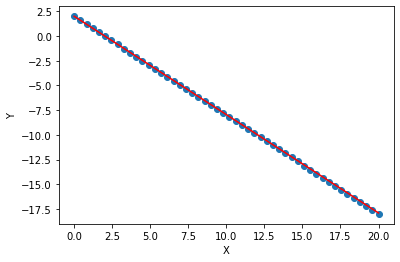

In [11]:
plt.scatter(X,Y);
plt.plot(X,X*theta_v[1] + theta_v[0], color ='red')
plt.xlabel('X')
plt.ylabel('Y');

R2 :  0.999916098755402


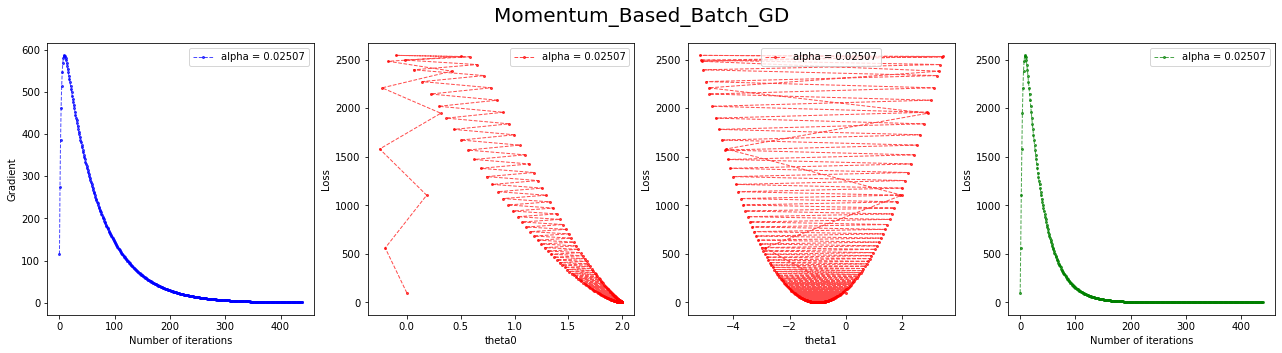

In [12]:
plot_func_with_iter_alpha(X,Y,Linear_Regression_Momentum_Based_Batch_GD,
                          iterations=1000, alpha=.02507, gamma = 0.7, title ="Momentum_Based_Batch_GD")

R2 :  0.9669940407922653


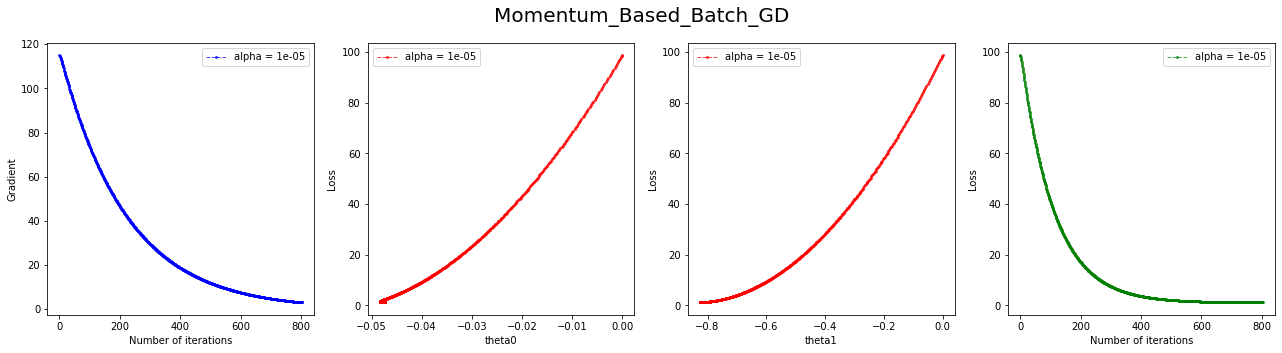

In [13]:
plot_func_with_iter_alpha(X,Y,Linear_Regression_Momentum_Based_Batch_GD,
                          iterations=1000, alpha=.00001, gamma = 0.7, title ="Momentum_Based_Batch_GD")

R2 :  -5.0346797186752886e+196


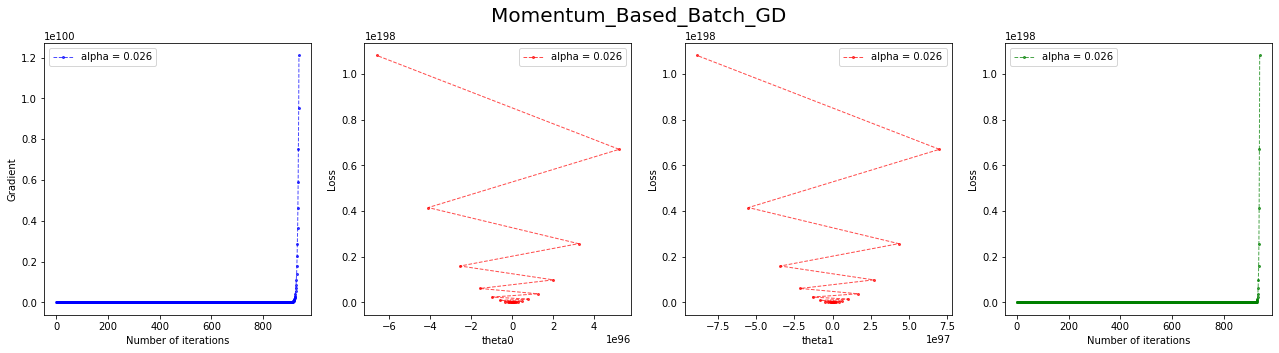

In [14]:
plot_func_with_iter_alpha(X,Y,Linear_Regression_Momentum_Based_Batch_GD,
                          iterations=1000, alpha=.026, gamma = 0.7, title ="Momentum_Based_Batch_GD")

R2 :  0.9745347722999139


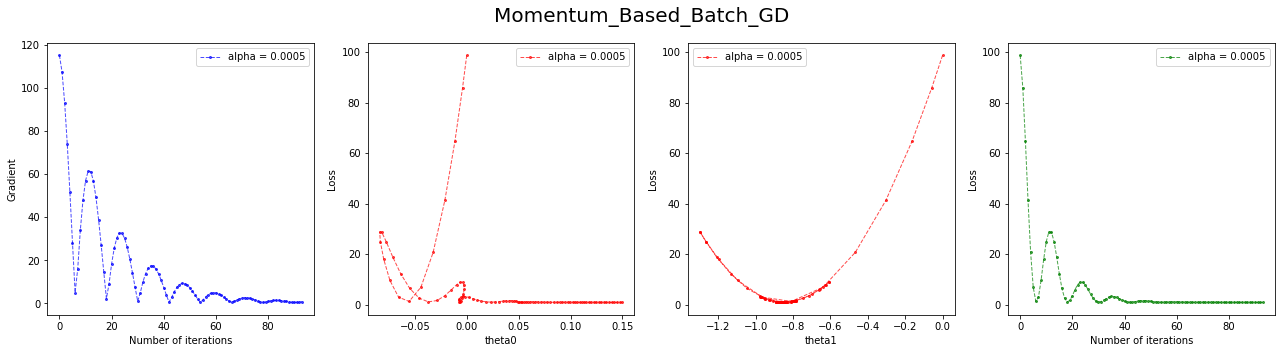

In [15]:
plot_func_with_iter_alpha(X,Y,Linear_Regression_Momentum_Based_Batch_GD,
                          iterations=1000, alpha=.0005, gamma = 0.9, title ="Momentum_Based_Batch_GD")

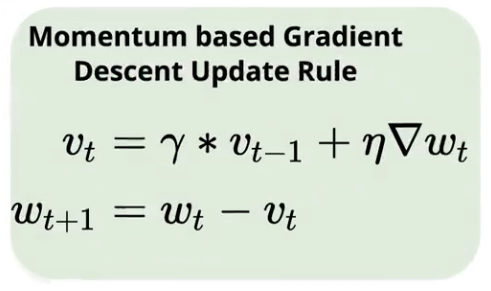

#### γ takes values between 0 and 1.
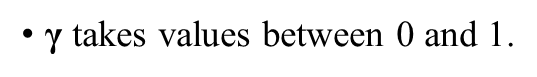

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

R2 :  0.9691410427290684


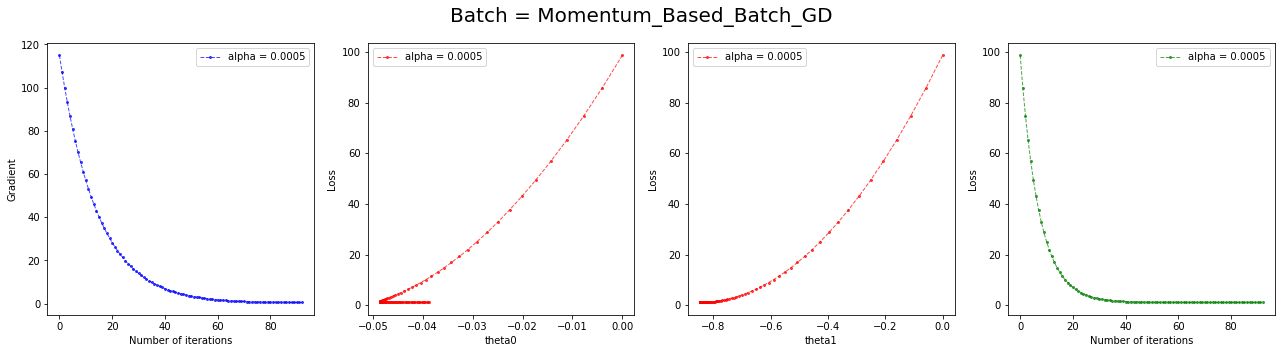

In [16]:
plot_func_with_iter_alpha(X,Y,Linear_Regression_Momentum_Based_Batch_GD,
                          iterations=1000, alpha=.0005, gamma = 0.0, title ="Batch = Momentum_Based_Batch_GD")

## Implementation of NAG 

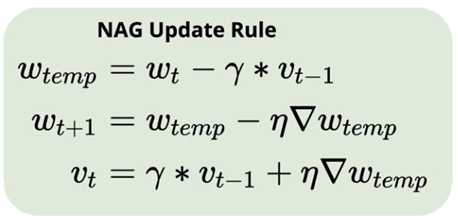

In [17]:
# Create a function to take x Matrix, y points, learning_rate(alpha) and max number of iterations() to get theta_vec

def Linear_Regression_Nesterov_Accelerated_GD(features_matrix, y_vec, alpha=.01, gamma= 0.7 , iterations=1000):
    
    # prepare features_matrix
    if features_matrix.ndim == 1:
        features_matrix = features_matrix[:,np.newaxis]   
    features_matrix = np.insert(features_matrix, 0 , np.ones(features_matrix.shape[0]), axis = 1)
    
    # initial parameters
    theta_vec = np.zeros(features_matrix.shape[1])
    vt = 0
    
    # make temp lists Just for visualization
    cost_lst = []
    GD_list = []
    all_theta_vecs = []
    h_theta_lst =[]

    for _ in range(iterations):
        
        # appending theta vector to list
        all_theta_vecs.append(theta_vec)
        
        # Calculate the predicted output
        h_theta = features_matrix @ theta_vec
        h_theta_lst.append(h_theta)
        
        # Calculate loss
        error_vec = h_theta - y_vec
        cost = ((np.linalg.norm(error_vec)) ** 2) / y_vec.shape[0]
        cost_lst.append(cost)
        
        # theta temp
        theta_vec = theta_vec - vt
            
        # Calculate the h-theta of theta temp
        h_theta = features_matrix @ theta_vec
        error_vec = h_theta - y_vec
        
        # Calculate gradient descent for theta temp
        GD = np.array((1/y_vec.shape[0])*(features_matrix.T @ error_vec))
        GD_list.append(round(np.linalg.norm(GD),8))
        
        
        # Update theta vector by theta temp and grediant theta temp
        theta_vec = theta_vec - alpha * GD
        
        
        # calculate vt by theta temp grediant 
        vt = gamma * vt + alpha * GD
        
        # Stop conditions
        if len(cost_lst) > 2:
            # Check minimum gradient
            if np.linalg.norm(GD) < 0.0001 or np.linalg.norm(GD) > 1e100:
                break
            # Check cost
            elif abs(cost_lst[-1] - cost_lst[-2]) < 0.0001:
                break
            # Check theta
            elif abs(np.linalg.norm(theta_vec) - np.linalg.norm(all_theta_vecs[-1])) < 0.0001:
                break
        
    #return
    return theta_vec, cost_lst, GD_list, np.array(all_theta_vecs), h_theta_lst

In [18]:
theta_v, cost_lst, GD_list, all_theta_vecs, h_theta_lst = Linear_Regression_Nesterov_Accelerated_GD(
    X, Y, alpha=.0049, gamma= 0.8 , iterations=1000)

In [19]:
theta_v

array([ 1.84401284, -0.98839707])

In [20]:
Y_pred = X*theta_v[1] + theta_v[0]
r2 =r2_score(Y,Y_pred)
print("R2 : ",r2)

R2 :  0.9998193514815892


R2 :  0.9998193514815892


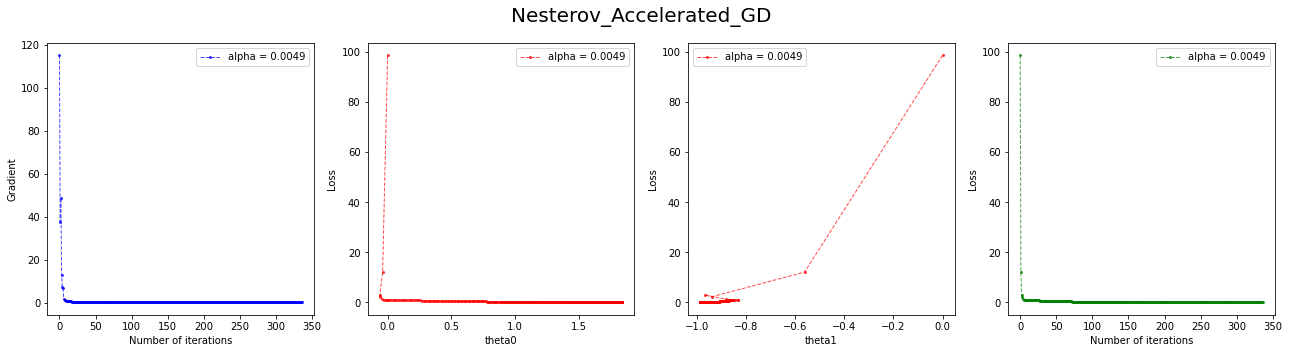

In [21]:
plot_func_with_iter_alpha(X,Y,Linear_Regression_Nesterov_Accelerated_GD,
                          iterations=1000, alpha=.0049, gamma = 0.8, title ="Nesterov_Accelerated_GD")

R2 :  0.9691137969141517


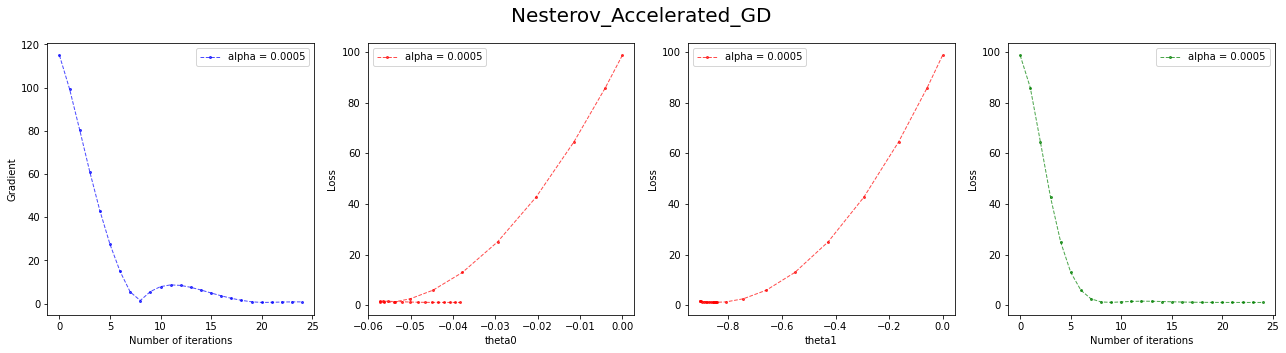

In [22]:
plot_func_with_iter_alpha(X,Y,Linear_Regression_Nesterov_Accelerated_GD,
                          iterations=1000, alpha=.0005, gamma = 0.7, title ="Nesterov_Accelerated_GD")